# Visualizing Naive Bayes

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from utils import confidence_ellipse #function to plot confidence ellipse

In [8]:
data=pd.read_csv(r'C:\Users\udayr\DLprojects\NLP\Twitter-Tweet-Sentiment-Analysis\data\bayes_features.csv')
data.head()

,positive,negative,sentiment
0,-45.763393,-63.351354,1.0
1,-105.491568,-114.204862,1.0
2,-57.028078,-67.216467,1.0
3,-10.055885,-18.589057,1.0
4,-125.749270,-138.334845,1.0


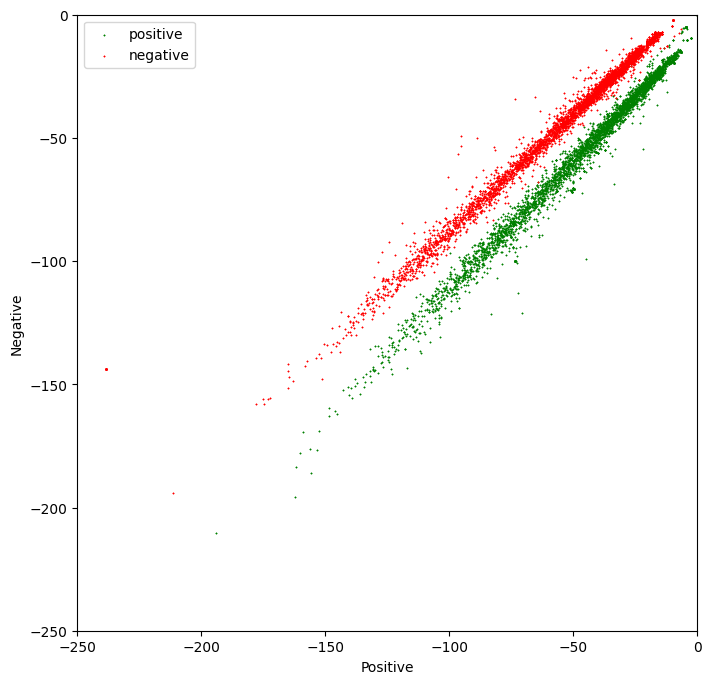

In [9]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8)) #Create a new figure with a custom size

colors = ['red', 'green'] # Define a color palete
sentiments = ['negative', 'positive'] 
# print(data.iloc[5]).positive
index = data.index

for sentiment in data.sentiment.unique():
    ix=index[data.sentiment==sentiment] # Get the index of the samples with the current sentiment
    # Scatter plot points for the current sentiment category
    # Use 'positive' column as x-coordinate and 'negative' column as y-coordinate
    # Set color based on sentiment category (red for negative, green for positive)
    
    ax.scatter(data.iloc[ix].positive, data.iloc[ix].negative, c=colors[int(sentiment)], label=sentiments[int(sentiment)], s=0.1,marker='*')

ax.legend(loc='best')

plt.xlim(-250,0)
plt.ylim(-250,0)

plt.xlabel("Positive")
plt.ylabel("Negative")
plt.show()

## Using Confidence Ellipses to interpret Naïve Bayes

A confidence ellipse is a way to visualize a 2D random variable. It is a better way than plotting the points over a cartesian plane because, with big datasets, the points can overlap badly and hide the real distribution of the data. Confidence ellipses summarize the information of the dataset with only four parameters: 

* Center: It is the numerical mean of the attributes
* Height and width: Related with the variance of each attribute. The user must specify the desired amount of standard deviations used to plot the ellipse. 
* Angle: Related with the covariance among attributes.

The parameter __n_std__ stands for the number of standard deviations bounded by the ellipse. Remember that for normal random distributions:

* About 68% of the area under the curve falls within 1 standard deviation around the mean.
* About 95% of the area under the curve falls within 2 standard deviations around the mean.
* About 99.7% of the area under the curve falls within 3 standard deviations around the mean.

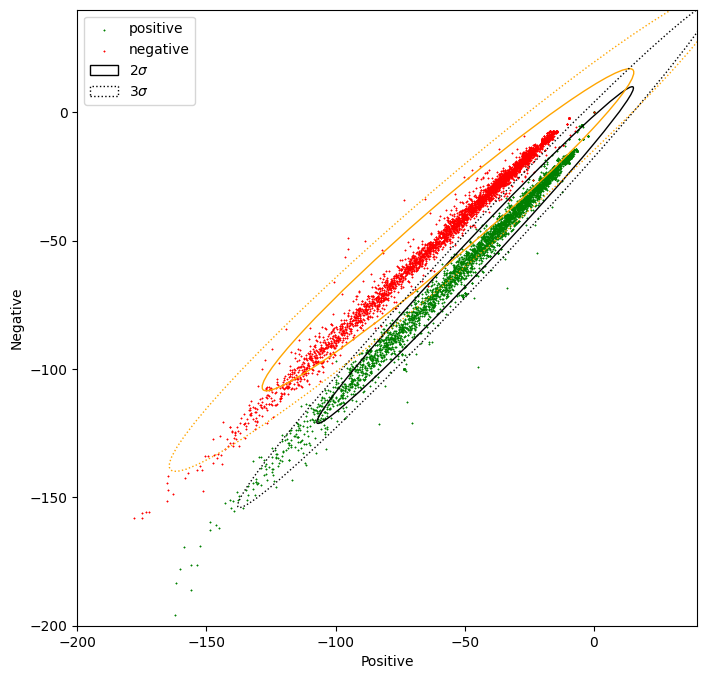

In [10]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green'] # Define a color palete
sentiments = ['negative', 'positive'] 
index = data.index

# Color base on sentiment
for sentiment in data.sentiment.unique():
    ix = index[data.sentiment == sentiment]
    ax.scatter(data.iloc[ix].positive, data.iloc[ix].negative, c=colors[int(sentiment)], s=0.1, marker='*', label=sentiments[int(sentiment)])

# Custom limits for this chart
plt.xlim(-200,40)  
plt.ylim(-200,40)

plt.xlabel("Positive") # x-axis label
plt.ylabel("Negative") # y-axis label

data_pos=data[data.sentiment==1]
data_neg=data[data.sentiment==0]

#Print confidence ellipses of 2 std
confidence_ellipse(data_pos.positive,data_pos.negative,ax,n_std=2,edgecolor='black',label=r'$2\sigma$')
confidence_ellipse(data_neg.positive,data_neg.negative,ax,n_std=2,edgecolor='orange')

#Print confidence ellipses of 3 std
confidence_ellipse(data_pos.positive,data_pos.negative,ax,n_std=3,edgecolor='black',linestyle=':',label=r'$3\sigma$')
confidence_ellipse(data_neg.positive,data_neg.negative,ax,n_std=3,edgecolor='orange',linestyle=':')
ax.legend(loc='best')
plt.show()

In the next cell, we will modify the features of the samples with positive sentiment (1), in a way that the two distributions overlap. In this case, the Naïve Bayes method will produce a lower accuracy than with the original data.

In [11]:
data2=data.copy() # Create a copy of the data frame

# The following 2 lines only modify the entries in the data frame where sentiment == 1
data2.positive[data.sentiment==1]=data2.positive/1.5 - 50 #modify positive attribute
data2.negative[data.sentiment==1]=data2.negative*1.5 + 50 #modify negative attribute

C:\Users\udayr\AppData\Local\Temp\ipykernel_7852\1885861240.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data2.positive[data.sentiment==1]=data2.positive/1.5 - 50 #modify positive attribute
C:\Users\udayr\AppData\Local\Temp\ipykernel_

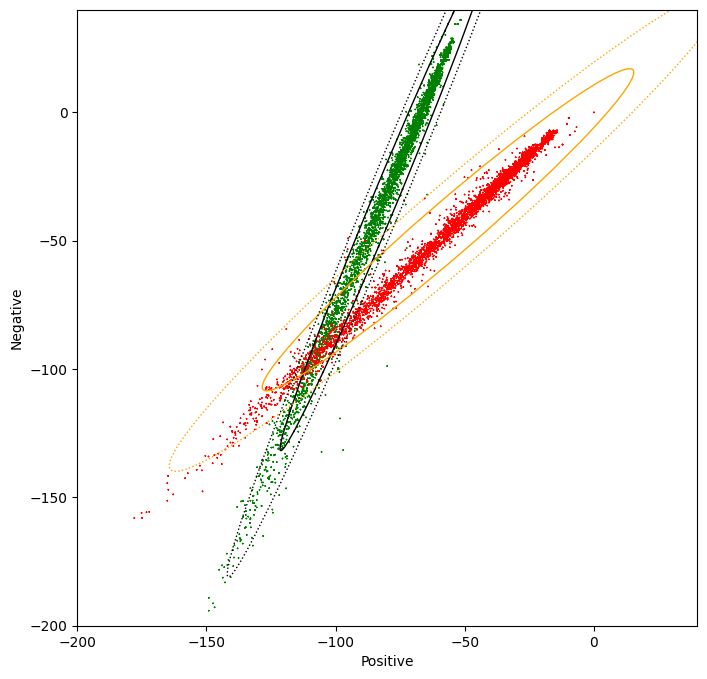

In [12]:
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green'] # Define a color palete
sentiments = ['negative', 'positive'] 
index = data2.index

# for sentiment in data2.sentiment.unique():
#     ix = index[data2.sentiment == sentiment]
    # ax.scatter(data2.iloc[ix].positive, data2.iloc[ix].negative, c=colors[int(sentiment)], s=0.1, marker='*', label=sentiments[int(sentiment)])

ax.scatter(data2.positive, data2.negative, c=[colors[int(k)] for k in data2.sentiment], s = 0.1, marker='*')  # Plot a dot for tweet

plt.xlim(-200,40)  
plt.ylim(-200,40)

plt.xlabel("Positive")
plt.ylabel("Negative")

data_pos=data2[data2.sentiment==1]
data_neg=data2[data2.sentiment==0]

#Print confidence ellipses of 2 std
confidence_ellipse(data_pos.positive,data_pos.negative,ax,n_std=2,edgecolor='black',label=r'$2\sigma$')
confidence_ellipse(data_neg.positive,data_neg.negative,ax,n_std=2,edgecolor='orange')

#Print confidence ellipses of 3 std
confidence_ellipse(data_pos.positive,data_pos.negative,ax,n_std=3,edgecolor='black',linestyle=':',label=r'$3\sigma$')
confidence_ellipse(data_neg.positive,data_neg.negative,ax,n_std=3,edgecolor='orange',linestyle=':') 

Understanding the data allows us to predict if the method will perform well or not. Alternatively, it will allow us to understand why it worked well or bad.